<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [4]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [5]:
#text processing stage.
from tqdm import tqdm
for index, row in tqdm(data_text.iterrows()):
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)


1109it [00:48, 23.54it/s]

there is no text description for id: 1109


1275it [00:55, 24.80it/s]

there is no text description for id: 1277


1405it [01:01, 23.99it/s]

there is no text description for id: 1407


1637it [01:11, 24.03it/s]

there is no text description for id: 1639


2755it [02:00, 21.17it/s]

there is no text description for id: 2755


3321it [02:25, 22.80it/s]


In [6]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [7]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


### Replace NaN with Gene+ Variation as Text

In [8]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [9]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


In [10]:
def check_count(f1,text):
    result=[]
    print(len(f1))
    for i in range(len(f1)):
        if f1[i].lower() in text[i].lower():
            result.append(text[i].lower().count(f1[i].lower()))
        else:
            result.append(0)
    return result 
            
            
        

In [11]:
def check_presence(f1,text):
    result=[]
    print(len(f1))
    for i in range(len(f1)):
        if f1[i].lower() in text[i].lower():
            result.append(1)
        else:
            result.append(0)
    return result 
            
            
        

## count the occurance of Gene  in Text.  

In [12]:
result['presence_gene_in_text']=check_presence(result['Gene'],result['TEXT'])
result['count_gene_in_text']=check_count(result['Gene'],result['TEXT'])

3321
3321


In [13]:
result['presence_variation_in_text']=check_presence(result['Variation'],result['TEXT'])
result['count_variation_in_text']=check_count(result['Variation'],result['TEXT'])

3321
3321


In [14]:

# code courtesy - https://www.kaggle.com/eavdeeva/cancer-all-gene-variation-values-are-unique
# Since all combination of Gene and Variation are unique in the dataset
# Combining Gene + Variation
result["Gene_and_Variation"] = result["Gene"] + "_" + result["Variation"]

In [15]:
result.head(5)

,ID,Gene,Variation,Class,TEXT,presence_gene_in_text,count_gene_in_text,presence_variation_in_text,count_variation_in_text,Gene_and_Variation
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...,1,34,0,0,FAM58A_Truncating Mutations
1,1,CBL,W802*,2,abstract background non small cell lung cancer...,1,166,0,0,CBL_W802*
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,1,166,1,13,CBL_Q249E
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,1,118,1,5,CBL_N454D
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,1,202,1,2,CBL_L399V


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [16]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [17]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


## Univaraite analysis on count_gene_in_text feature 

In [18]:
train_count_gene_in_text=train_df['count_gene_in_text'].to_frame()
test_count_gene_in_text=test_df['count_gene_in_text'].to_frame()
cv_count_gene_in_text=cv_df['count_gene_in_text'].to_frame()

train_presence_gene_in_text=train_df['presence_gene_in_text'].to_frame()
test_presence_gene_in_text=test_df['presence_gene_in_text'].to_frame()
cv_presence_gene_in_text=cv_df['presence_gene_in_text'].to_frame()


For values of alpha =  1e-05 The log loss is: 1.816237787085441
For values of alpha =  0.0001 The log loss is: 1.8131513576080778
For values of alpha =  0.001 The log loss is: 1.8127668976015383
For values of alpha =  0.01 The log loss is: 1.811930950572545
For values of alpha =  0.1 The log loss is: 1.811805005860512
For values of alpha =  1 The log loss is: 1.8116517492746178


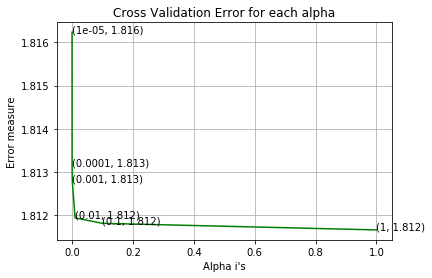

For values of best alpha =  1 The train log loss is: 1.81391567539934
For values of best alpha =  1 The cross validation log loss is: 1.811651749628213
For values of best alpha =  1 The test log loss is: 1.8213568978616395


In [19]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log')
    clf.fit(train_count_gene_in_text, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_count_gene_in_text, y_train)
    predict_y = sig_clf.predict_proba(cv_count_gene_in_text)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_count_gene_in_text, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_count_gene_in_text, y_train)

predict_y = sig_clf.predict_proba(train_count_gene_in_text)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_count_gene_in_text)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_count_gene_in_text)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


## Univaraite analysis on count_variation_in_text feature 

In [20]:
train_count_variation_in_text=train_df['count_variation_in_text'].to_frame()
test_count_variation_in_text=test_df['count_variation_in_text'].to_frame()
cv_count_variation_in_text=cv_df['count_variation_in_text'].to_frame()


train_presence_variation_in_text=train_df['presence_variation_in_text'].to_frame()
test_presence_variation_in_text=test_df['presence_variation_in_text'].to_frame()
cv_presence_variation_in_text=cv_df['presence_variation_in_text'].to_frame()


For values of alpha =  1e-05 The log loss is: 1.8109185296149701
For values of alpha =  0.0001 The log loss is: 1.8109185296150287
For values of alpha =  0.001 The log loss is: 1.8108605897003744
For values of alpha =  0.01 The log loss is: 1.8108782955458882
For values of alpha =  0.1 The log loss is: 1.8108605906071669
For values of alpha =  1 The log loss is: 1.8108605950988166


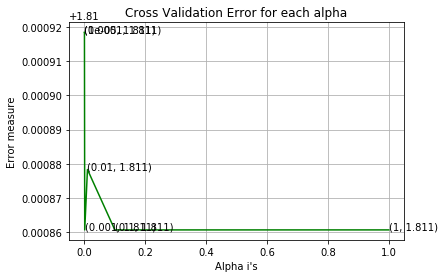

For values of best alpha =  0.001 The train log loss is: 1.8150461967396558
For values of best alpha =  0.001 The cross validation log loss is: 1.8108782949709759
For values of best alpha =  0.001 The test log loss is: 1.80913270986893


In [21]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log')
    clf.fit(train_count_variation_in_text, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_count_variation_in_text, y_train)
    predict_y = sig_clf.predict_proba(cv_count_variation_in_text)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_count_variation_in_text, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_count_variation_in_text, y_train)

predict_y = sig_clf.predict_proba(train_count_variation_in_text)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_count_variation_in_text)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_count_variation_in_text)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


## TFIDF on the TEXT Features

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2

feature_names_tfidf=[]
vectorizer = TfidfVectorizer(ngram_range=(1,1),min_df=5,max_features=10000)

X_train_text_tfidf=vectorizer.fit_transform(train_df['TEXT'])
X_test_text_tfidf=vectorizer.transform(test_df['TEXT'])
X_cv_text_tfidf=vectorizer.transform(cv_df['TEXT'])
feature_names_tfidf.extend(vectorizer.get_feature_names())


# kbest=SelectKBest(k=100).fit(df_train,y_train)
# X_train_text_tfidf=kbest.transform(X=df_train)
# X_test_text_tfidf =kbest.transform(X=df_test)
# X_cv_text_tfidf =kbest.transform(X=df_cv)


print(X_train_text_tfidf.shape)
print(X_test_text_tfidf.shape)
print(X_cv_text_tfidf.shape)



(2124, 10000)
(665, 10000)
(532, 10000)


In [50]:
import category_encoders as ce
vectorizer = ce.TargetEncoder()

vectorizer.fit(X_train_text_tfidf,y_train)
X_train_text_tfidf=vectorizer.transform(X_train_text_tfidf)
X_test_text_tfidf=vectorizer.transform(X_test_text_tfidf)
X_cv_text_tfidf=vectorizer.transform(X_cv_text_tfidf)

print(X_train_text_tfidf.shape)
print(X_test_text_tfidf.shape)
print(X_cv_text_tfidf.shape)


(2124, 10000)
(665, 10000)
(532, 10000)


In [24]:
vectorizer = TfidfVectorizer()
train_Gene=vectorizer.fit_transform(train_df['Gene'])
test_Gene=vectorizer.transform(test_df['Gene'])
cv_Gene=vectorizer.transform(cv_df['Gene'])

feature_names_tfidf.extend(vectorizer.get_feature_names())

print(train_Gene.shape)
print(test_Gene.shape)
print(cv_Gene.shape)

(2124, 229)
(665, 229)
(532, 229)


In [51]:
import category_encoders as ce

encoder = ce.TargetEncoder()
train_Gene=encoder.fit_transform(train_Gene,y_train)
test_Gene=encoder.transform(test_Gene)
cv_Gene=encoder.transform(cv_Gene)

print(train_Gene.shape)
print(test_Gene.shape)
print(cv_Gene.shape)

(2124, 229)
(665, 229)
(532, 229)




##  Encoding the variation

In [26]:
vectorizer = TfidfVectorizer()
train_Variation=vectorizer.fit_transform(train_df['Variation'])
test_Variation=vectorizer.transform(test_df['Variation'])
cv_Variation=vectorizer.transform(cv_df['Variation'])

feature_names_tfidf.extend(vectorizer.get_feature_names())

print(train_Variation.shape)
print(test_Variation.shape)
print(cv_Variation.shape)


(2124, 1938)
(665, 1938)
(532, 1938)


In [52]:
import category_encoders as ce

encoder = ce.TargetEncoder()
train_Variation=encoder.fit_transform(train_Variation,y_train)
test_Variation=encoder.transform(test_Variation)
cv_Variation=encoder.transform(cv_Variation)

print(train_Variation.shape)
print(test_Variation.shape)
print(cv_Variation.shape)


(2124, 1938)
(665, 1938)
(532, 1938)


## encode gene+variation

In [28]:
vectorizer = TfidfVectorizer()
train_Gene_and_Variation=vectorizer.fit_transform(train_df['Gene_and_Variation'])
test_Gene_and_Variation=vectorizer.transform(test_df['Gene_and_Variation'])
cv_Gene_and_Variation=vectorizer.transform(cv_df['Gene_and_Variation'])

feature_names_tfidf.extend(vectorizer.get_feature_names())

print(train_Gene_and_Variation.shape)
print(test_Gene_and_Variation.shape)
print(cv_Gene_and_Variation.shape)


(2124, 2178)
(665, 2178)
(532, 2178)


In [53]:
import category_encoders as ce

encoder = ce.TargetEncoder()
train_Gene_and_Variation=encoder.fit_transform(train_Gene_and_Variation,y_train)
test_Gene_and_Variation=encoder.transform(test_Gene_and_Variation)
cv_Gene_and_Variation=encoder.transform(cv_Gene_and_Variation)

print(train_Gene_and_Variation.shape)
print(train_Gene_and_Variation.shape)
print(train_Gene_and_Variation.shape)


(2124, 2178)
(2124, 2178)
(2124, 2178)


In [54]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# X_train_tfidf=hstack((train_Gene,train_Variation,X_train_text_tfidf,train_count_gene_in_text,train_count_variation_in_text,train_Gene_and_Variation,train_presence_gene_in_text,train_presence_variation_in_text)).tocsr()

# X_test_tfidf=hstack((test_Gene,test_Variation,X_test_text_tfidf,test_count_gene_in_text,test_count_variation_in_text,test_Gene_and_Variation,test_presence_gene_in_text,test_presence_variation_in_text)).tocsr()

# X_cv_tfidf=hstack((cv_Gene,cv_Variation,X_cv_text_tfidf,cv_count_gene_in_text,cv_count_variation_in_text,cv_Gene_and_Variation,cv_presence_gene_in_text,cv_presence_variation_in_text)).tocsr()

X_train_tfidf=hstack((train_Gene,train_Variation,X_train_text_tfidf,train_Gene_and_Variation,train_presence_gene_in_text,train_presence_variation_in_text)).tocsr()

X_test_tfidf=hstack((test_Gene,test_Variation,X_test_text_tfidf,test_Gene_and_Variation,test_presence_gene_in_text,test_presence_variation_in_text)).tocsr()

X_cv_tfidf=hstack((cv_Gene,cv_Variation,X_cv_text_tfidf,cv_Gene_and_Variation,cv_presence_gene_in_text,cv_presence_variation_in_text)).tocsr()

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_cv_tfidf.shape)


(2124, 14347)
(665, 14347)
(532, 14347)


<h2>4.3. Logistic Regression with class balancing</h2>

In [55]:
from sklearn.linear_model  import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss

summary=[]

log_loss_cv_tfidf_dict={}
log_loss_train_tfidf_dict={}


alpha=[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100,1000,1000]
for i in tqdm(alpha):
    # create instance of model
    lr=LogisticRegression(penalty='l2',class_weight='balanced',C=i,random_state=42)
    
    # fitting the model on crossvalidation train
    lr.fit(X_train_tfidf, y_train)
    
    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(lr, method="sigmoid")
    calibrated.fit(X_train_tfidf, y_train)
    
    # predict the response on the crossvalidation train
    pred_tfidf_cv = calibrated.predict_proba(X_cv_tfidf)
    
    #evaluate CV log loss
    log_loss_cv=log_loss(y_cv,pred_tfidf_cv)
    
    #insert into dict
    log_loss_cv_tfidf_dict[i]=log_loss_cv
    
    # predict the response on the train
    pred_tfidf_train = calibrated.predict_proba(X_train_tfidf)
    
    #evaluate train roc_auc
    log_loss_train =log_loss(y_train,pred_tfidf_train)
    
    #insert into dict
    log_loss_train_tfidf_dict[i]=log_loss_train
    
    
    
print(log_loss_cv_tfidf_dict)
print(log_loss_train_tfidf_dict)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:38<00:00, 14.22s/it]


{1e-05: 1.8121656475573582, 0.0001: 1.8117883293191237, 0.001: 1.8062904774675737, 0.01: 1.6753202207606537, 0.1: 1.2124865146128918, 0.2: 1.1406110085755956, 0.3: 1.11096510661379, 0.4: 1.0935555476016008, 0.5: 1.0817498074012262, 0.6: 1.073124593107235, 0.7: 1.0664851163785385, 0.8: 1.0612340678566308, 0.9: 1.0569636963310134, 1: 1.0534343414177616, 10: 1.021775524430707, 100: 1.019963927322537, 1000: 1.02155867294752}
{1e-05: 1.819021463594658, 0.0001: 1.81856488685096, 0.001: 1.8109839514566124, 0.01: 1.6127320590397796, 0.1: 0.9678163302338878, 0.2: 0.8268584812055219, 0.3: 0.7509863800540595, 0.4: 0.6994851597009935, 0.5: 0.661162626841229, 0.6: 0.6312253847526637, 0.7: 0.6070348893375656, 0.8: 0.5870422547584538, 0.9: 0.5702123025971395, 1: 0.5558391047198846, 10: 0.3916205273791589, 100: 0.3541082681631095, 1000: 0.34096189379413205}


### Plot ROC_AUC_score VS different alpha values (Train and CV set)

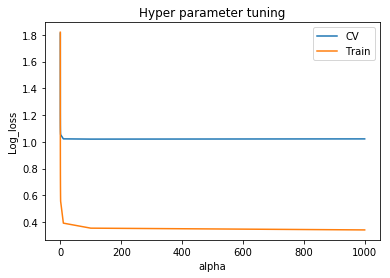

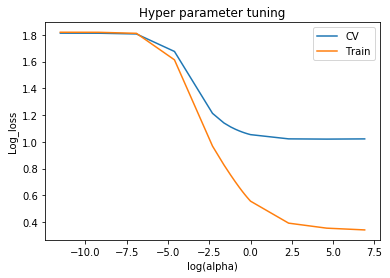

In [56]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(log_loss_cv_tfidf_dict.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(log_loss_train_tfidf_dict.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('Log_loss')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('Log_loss')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()


In [57]:
###  Find best alpha

#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
def find_highest_alpha(k_dict):
    k=min(k_dict, key=k_dict.get)
    return k 

In [58]:
###  Find best alpha
print(find_highest_alpha(log_loss_cv_tfidf_dict))


100


In [59]:
from sklearn.metrics.classification import accuracy_score, log_loss
# train model on the best alpha
lr = LogisticRegression(penalty='l2',class_weight='balanced',C=find_highest_alpha(log_loss_cv_tfidf_dict),random_state=42)

# fitting the model on crossvalidation train
lr.fit(X_train_tfidf, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=lr,method='sigmoid')

calibrated.fit(X_train_tfidf,y_train)


# predict the response on the crossvalidation train
pred_tfidf_test = calibrated.predict(X_test_tfidf)
pred_tfidf_train = calibrated.predict(X_train_tfidf)


#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = lr.predict_proba(X_test)
pred_tfidf_test_scores=calibrated.predict_proba(X_test_tfidf)
pred_tfidf_train_scores=calibrated.predict_proba(X_train_tfidf)
pred_tfidf_cv_scores=calibrated.predict_proba(X_cv_tfidf)

log_loss_test=log_loss(y_test,pred_tfidf_test_scores)
log_loss_train=log_loss(y_train,pred_tfidf_train_scores)
log_loss_cv=log_loss(y_cv,pred_tfidf_cv_scores)



print("the log loss for test :{}".format(log_loss_test))
print("the log loss for train :{}".format(log_loss_train))
print("the log loss for cv :{}".format(log_loss_cv))



the log loss for test :0.9981869503420902
the log loss for train :0.3541082681631095
the log loss for cv :1.019963927322537


In [60]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

-------------------- Confusion matrix --------------------


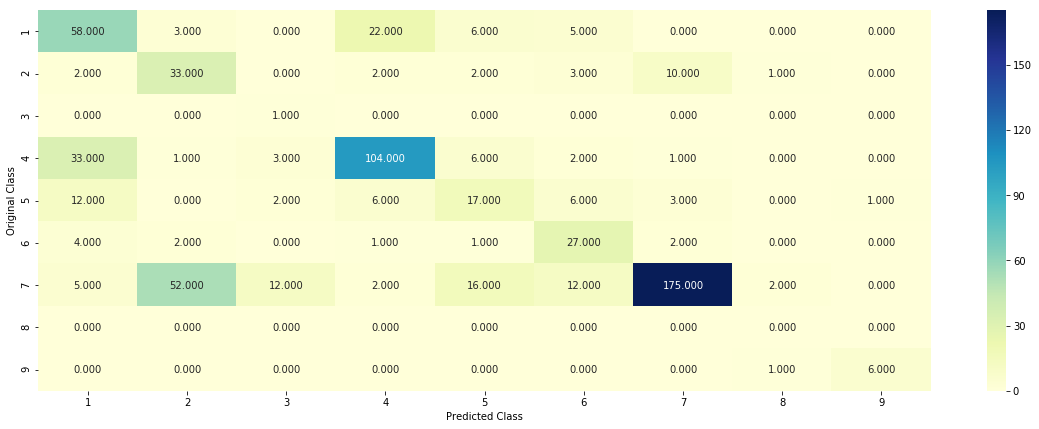

-------------------- Precision matrix (Columm Sum=1) --------------------


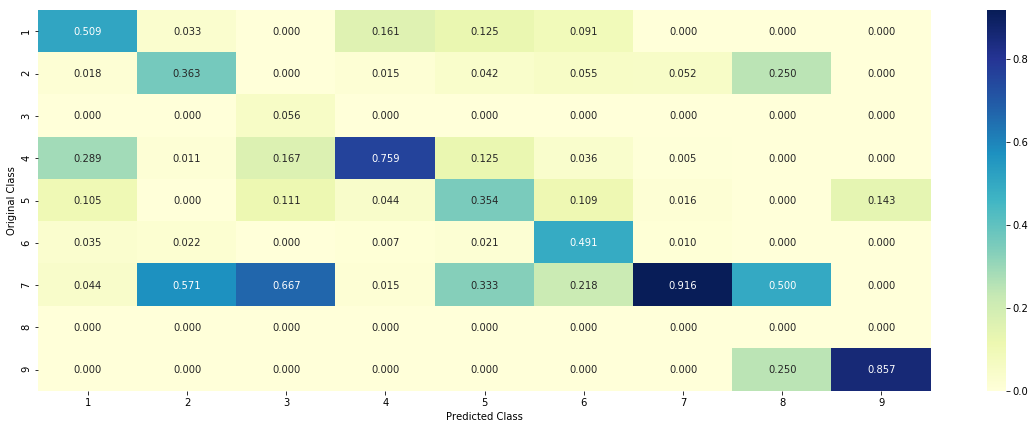

-------------------- Recall matrix (Row sum=1) --------------------


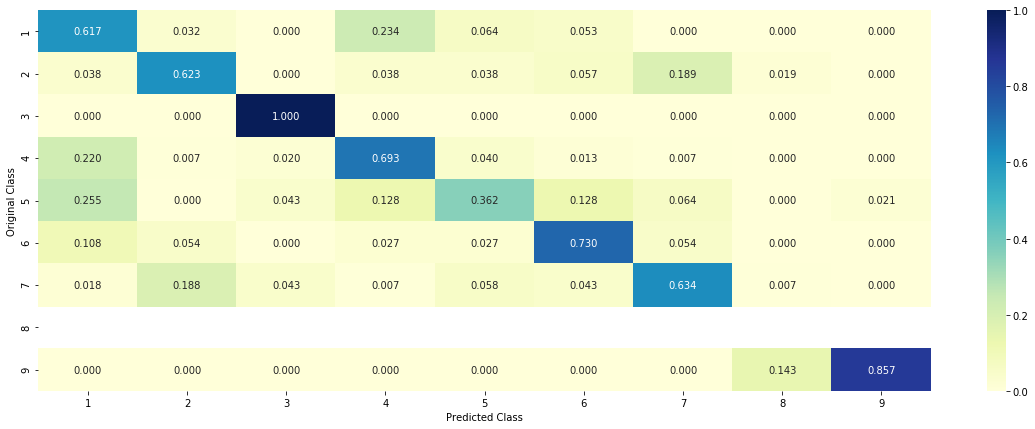

In [61]:
plot_confusion_matrix(pred_tfidf_test,y_test )

In [62]:
mis_class=np.count_nonzero((pred_tfidf_test- y_test))/y_test.shape[0]
print("% of missclassified point :",mis_class)

summary.append(['LR- Class Balancing','TFIDF',find_highest_alpha(log_loss_cv_tfidf_dict),'NA',log_loss_train,log_loss_test,log_loss_cv,mis_class])


% of missclassified point : 0.3669172932330827


<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [63]:
test_point_index = 1
no_feature = 10
predicted_cls = calibrated.predict(X_test_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(calibrated.predict_proba(X_test_tfidf[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-lr.coef_)[predicted_cls-1][:,:no_feature]
print(indices)
print("-"*50)
print("The top 10 features are:")
for i in tqdm(indices[0]):
    print(feature_names_tfidf[i])

Predicted Class : 7
Predicted Class Probabilities: [[0.0316 0.2837 0.0134 0.0623 0.0201 0.2282 0.3477 0.0056 0.0076]]
Actual Class : 6
[[13169   143   108  4072  1201 14293  5618    55  5971   695]]
--------------------------------------------------
The top 10 features are:


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

fusion
1640
138
gata3
arg
tsc2_l493p
lymphoma
1040
ministry
9e10


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 835.07it/s]


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [64]:
test_point_index = 290

no_feature = 10
predicted_cls = calibrated.predict(X_test_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(calibrated.predict_proba(X_test_tfidf[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-lr.coef_)[predicted_cls-1][:,:no_feature]
print(indices)
print("-"*50)
print("The top 10 features are:")
for i in tqdm(indices[0]):
    print(feature_names_tfidf[i])


Predicted Class : 6
Predicted Class Probabilities: [[0.0467 0.0088 0.0247 0.0903 0.0577 0.7605 0.0074 0.002  0.002 ]]
Actual Class : 6
[[   28 12526 12412   446 14332  2056   842 13992   902 14184]]
--------------------------------------------------
The top 10 features are:


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

035
brca1_s308a
brca1_d1818g
3b
vhl_v84l
cl
acts
runx1_g42r
advance
tp53_h115n


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1253.30it/s]


<h2>4.3. Logistic Regression without class balancing</h2>

In [65]:
from sklearn.linear_model  import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss


log_loss_cv_tfidf_dict={}
log_loss_train_tfidf_dict={}


alpha=[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100,1000,1000]
for i in tqdm(alpha):
    # create instance of model
    lr=LogisticRegression(penalty='l2',C=i,random_state=42)
    
    # fitting the model on crossvalidation train
    lr.fit(X_train_tfidf, y_train)
    
    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(lr, method="sigmoid")
    calibrated.fit(X_train_tfidf, y_train)
    
    # predict the response on the crossvalidation train
    pred_tfidf_cv = calibrated.predict_proba(X_cv_tfidf)
    
    #evaluate CV log loss
    log_loss_cv=log_loss(y_cv,pred_tfidf_cv)
    
    #insert into dict
    log_loss_cv_tfidf_dict[i]=log_loss_cv
    
    # predict the response on the train
    pred_tfidf_train = calibrated.predict_proba(X_train_tfidf)
    
    #evaluate train roc_auc
    log_loss_train =log_loss(y_train,pred_tfidf_train)
    
    #insert into dict
    log_loss_train_tfidf_dict[i]=log_loss_train
    
    
    
print(log_loss_cv_tfidf_dict)
print(log_loss_train_tfidf_dict)


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:41<00:00, 15.35s/it]


{1e-05: 1.8070263082908489, 0.0001: 1.8057327024459457, 0.001: 1.7887295286237106, 0.01: 1.548848625490504, 0.1: 1.2230370006759095, 0.2: 1.167337671429074, 0.3: 1.1342892360265682, 0.4: 1.1123259155155103, 0.5: 1.0965559360204948, 0.6: 1.0845635090901002, 0.7: 1.0752162746800167, 0.8: 1.067871530667689, 0.9: 1.0620470687451318, 1: 1.0573751719633722, 10: 1.022760097149806, 100: 1.0207454231775843, 1000: 1.0222232461895453}
{1e-05: 1.8126051568497774, 0.0001: 1.8111442525081438, 0.001: 1.7917058121308007, 0.01: 1.50854490377127, 0.1: 1.001166620787581, 0.2: 0.848557840760654, 0.3: 0.7609881962403374, 0.4: 0.7012704026291523, 0.5: 0.6564636685441139, 0.6: 0.6216065025691891, 0.7: 0.5940506138408035, 0.8: 0.5719395710295685, 0.9: 0.5538718172585418, 1: 0.5388375152265042, 10: 0.38766413735020405, 100: 0.3532480371512888, 1000: 0.3405532671172519}


### Plot ROC_AUC_score VS different alpha values (Train and CV set)

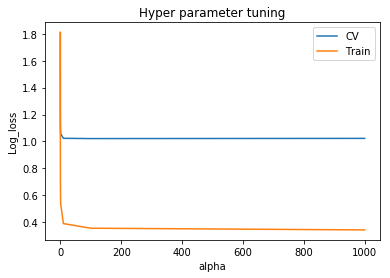

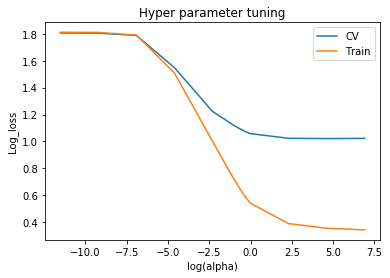

In [66]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(log_loss_cv_tfidf_dict.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(log_loss_train_tfidf_dict.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('Log_loss')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('Log_loss')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()


In [67]:
###  Find best alpha
print(find_highest_alpha(log_loss_cv_tfidf_dict))


100


In [68]:
from sklearn.metrics.classification import accuracy_score, log_loss
# train model on the best alpha
lr = LogisticRegression(penalty='l2',C=find_highest_alpha(log_loss_cv_tfidf_dict),random_state=42)

# fitting the model on crossvalidation train
lr.fit(X_train_tfidf, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=lr,method='sigmoid')

calibrated.fit(X_train_tfidf,y_train)


# predict the response on the crossvalidation train
pred_tfidf_test = calibrated.predict(X_test_tfidf)
pred_tfidf_train = calibrated.predict(X_train_tfidf)


#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = lr.predict_proba(X_test)
pred_tfidf_test_scores=calibrated.predict_proba(X_test_tfidf)
pred_tfidf_train_scores=calibrated.predict_proba(X_train_tfidf)
pred_tfidf_cv_scores=calibrated.predict_proba(X_cv_tfidf)

log_loss_test=log_loss(y_test,pred_tfidf_test_scores)
log_loss_train=log_loss(y_train,pred_tfidf_train_scores)
log_loss_cv=log_loss(y_cv,pred_tfidf_cv_scores)



print("the log loss for test :{}".format(log_loss_test))
print("the log loss for train :{}".format(log_loss_train))
print("the log loss for cv :{}".format(log_loss_cv))



the log loss for test :0.9986301229097357
the log loss for train :0.3532480371512888
the log loss for cv :1.0207454231775843


-------------------- Confusion matrix --------------------


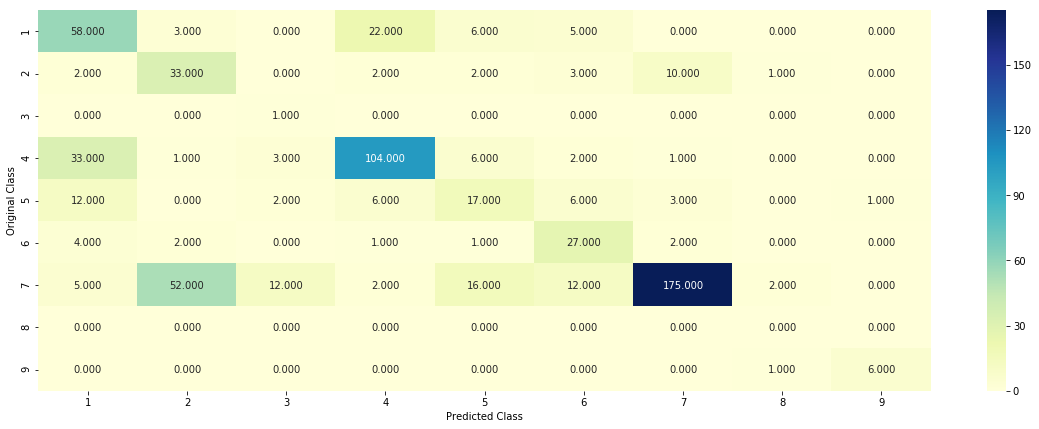

-------------------- Precision matrix (Columm Sum=1) --------------------


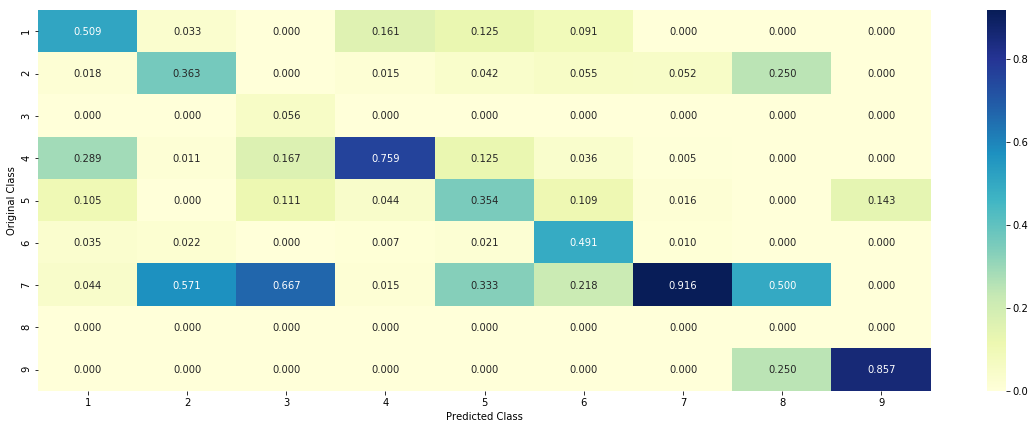

-------------------- Recall matrix (Row sum=1) --------------------


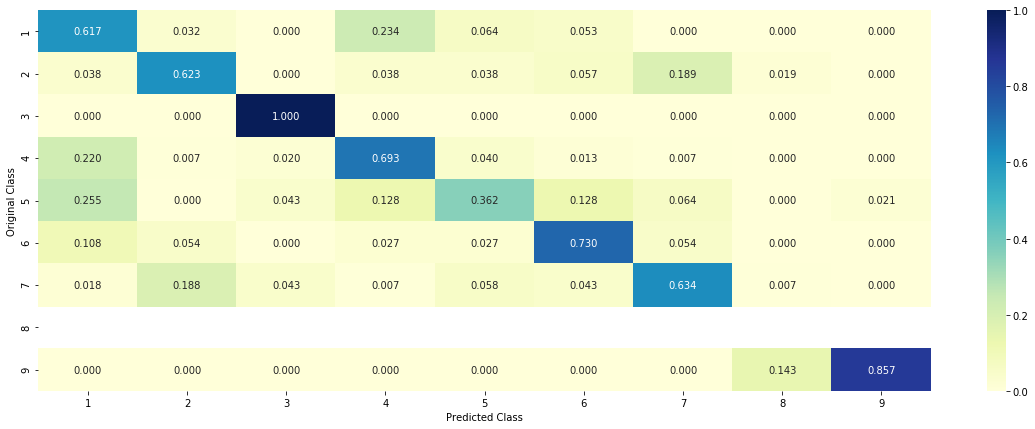

In [69]:
plot_confusion_matrix(pred_tfidf_test,y_test )

In [70]:
mis_class=np.count_nonzero((pred_tfidf_test- y_test))/y_test.shape[0]
print("% of missclassified point :",mis_class)

summary.append(['LR- NO Class Balancing','TFIDF-RE',find_highest_alpha(log_loss_cv_tfidf_dict),'NA',log_loss_train,log_loss_test,log_loss_cv,mis_class])


% of missclassified point : 0.3669172932330827


<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [71]:
test_point_index = 1
no_feature = 10
predicted_cls = calibrated.predict(X_test_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(calibrated.predict_proba(X_test_tfidf[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-lr.coef_)[predicted_cls-1][:,:no_feature]
print(indices)
print("-"*50)
print("The top 10 features are:")
for i in tqdm(indices[0]):
    print(feature_names_tfidf[i])


Predicted Class : 7
Predicted Class Probabilities: [[0.0315 0.2829 0.0141 0.0619 0.0204 0.2297 0.3444 0.0064 0.0086]]
Actual Class : 6
[[13169   143   108  4072  1201 14293  5618   695  5971    55]]
--------------------------------------------------
The top 10 features are:


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

fusion
1640
138
gata3
arg
tsc2_l493p
lymphoma
9e10
ministry
1040


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 640.21it/s]


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [72]:
test_point_index = 290
no_feature = 10
predicted_cls = calibrated.predict(X_test_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(calibrated.predict_proba(X_test_tfidf[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-lr.coef_)[predicted_cls-1][:,:no_feature]
print(indices)
print("-"*50)
print("The top 10 features are:")
for i in tqdm(indices[0]):
    print(feature_names_tfidf[i])

Predicted Class : 6
Predicted Class Probabilities: [[0.0467 0.009  0.0255 0.0894 0.0583 0.7595 0.0081 0.0018 0.0018]]
Actual Class : 6
[[   28 12526 12412   446  2056 14332   842 13992   902 14184]]
--------------------------------------------------
The top 10 features are:


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

035
brca1_s308a
brca1_d1818g
3b
cl
vhl_v84l
acts
runx1_g42r
advance
tp53_h115n


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 640.00it/s]


In [73]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer","DataSet","Hp1","Hp2", "logloss_train","logloss_test", "logloss_cv","mis_class"]

for each in summary:
    x.add_row(each)

print(x)

+------------------------+----------+-----+-----+--------------------+--------------------+--------------------+--------------------+
|       Vectorizer       | DataSet  | Hp1 | Hp2 |   logloss_train    |    logloss_test    |     logloss_cv     |     mis_class      |
+------------------------+----------+-----+-----+--------------------+--------------------+--------------------+--------------------+
|  LR- Class Balancing   |  TFIDF   | 100 |  NA | 0.3541082681631095 | 0.9981869503420902 | 1.019963927322537  | 0.3669172932330827 |
| LR- NO Class Balancing | TFIDF-RE | 100 |  NA | 0.3532480371512888 | 0.9986301229097357 | 1.0207454231775843 | 0.3669172932330827 |
+------------------------+----------+-----+-----+--------------------+--------------------+--------------------+--------------------+
